In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('flight_dataset.csv', delimiter=',')
df.set_index('Unnamed: 0', inplace=True)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
Unnamed: 0,,,,,,,,,,,
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099


In [29]:
# creating a list containing the columns that we want to analyze
l=[]
for i in df.columns:
        l.append(i)
l.remove('flight')
l.remove('price')
l

['airline',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left']

Distribution Frequency:
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64


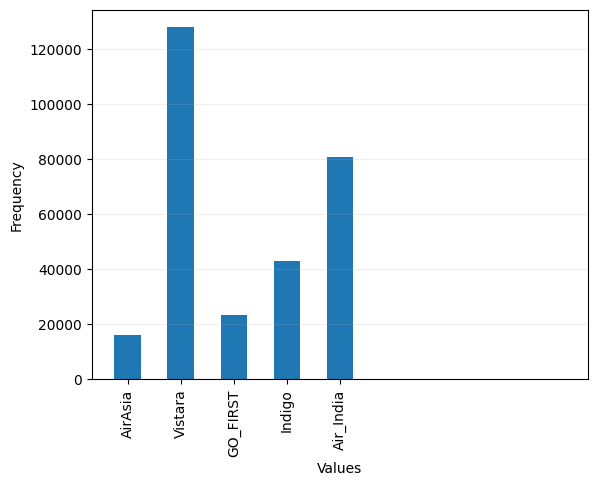

Distribution Frequency:
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64


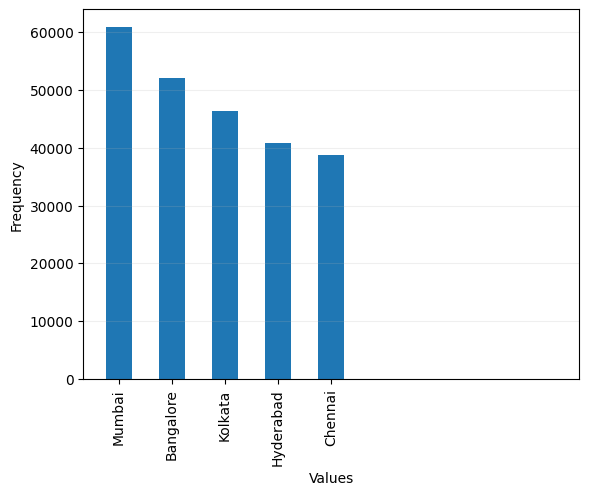

Distribution Frequency:
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64


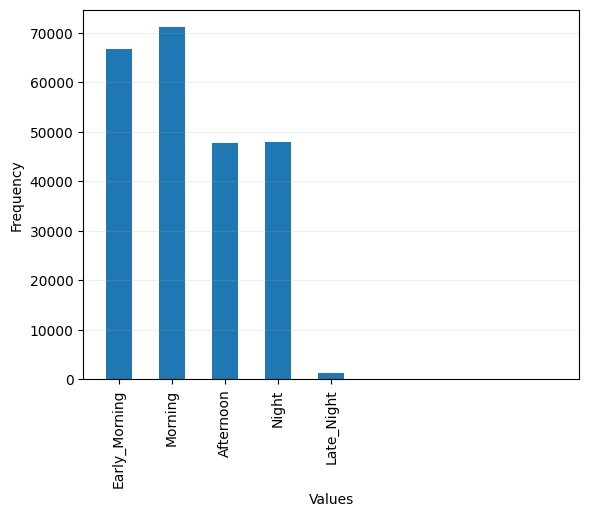

Distribution Frequency:
one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64


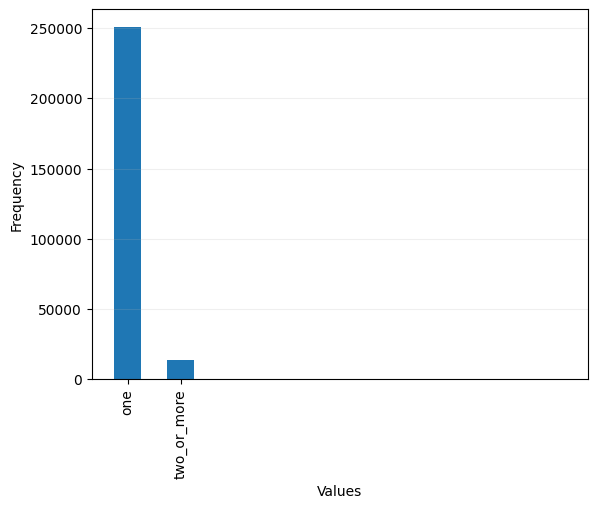

Distribution Frequency:
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64


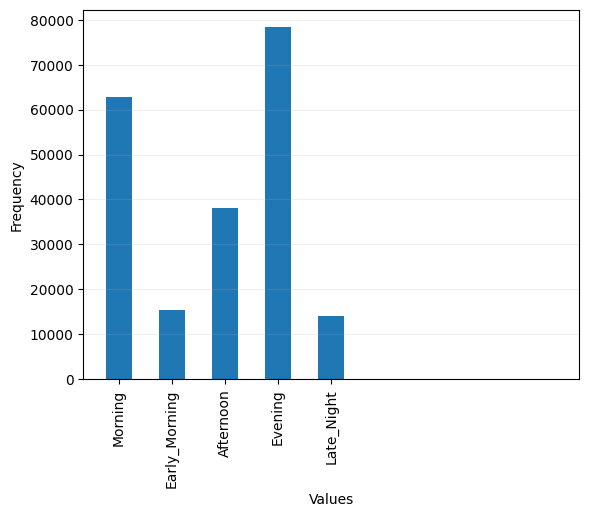

Distribution Frequency:
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64


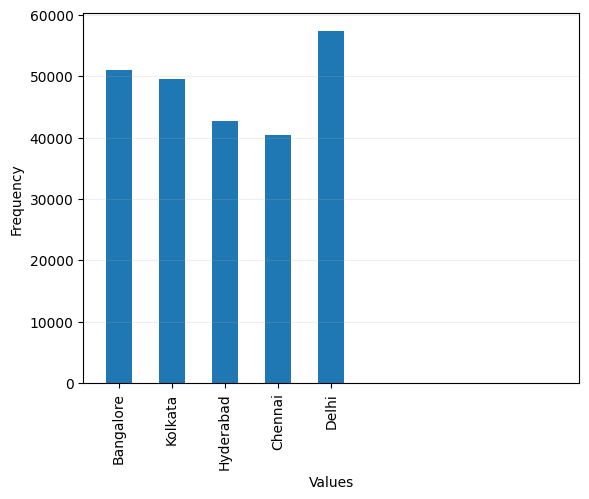

Distribution Frequency:
Economy     206666
Business     93487
Name: class, dtype: int64


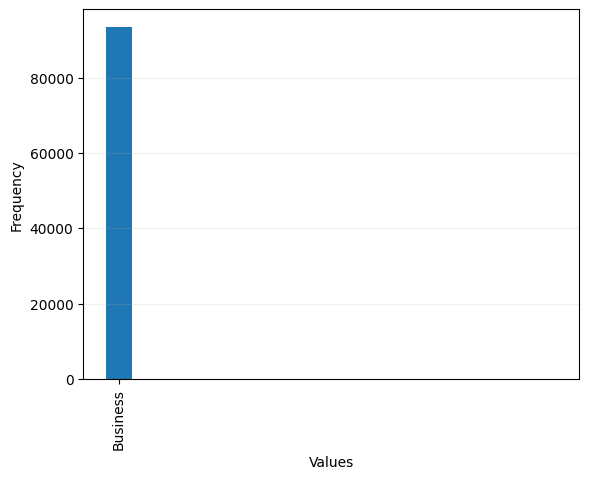

Distribution Frequency:
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: duration, Length: 476, dtype: int64


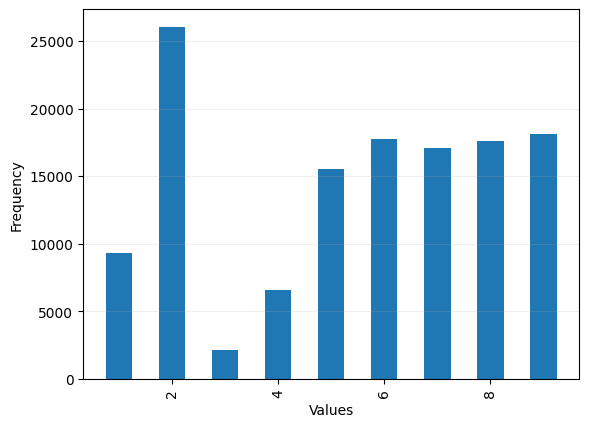

Distribution Frequency:
25    6633
18    6602
39    6593
32    6585
26    6573
24    6542
19    6537
31    6534
33    6532
40    6531
41    6525
28    6522
38    6512
20    6502
30    6501
42    6497
22    6494
36    6490
21    6479
37    6476
43    6472
44    6436
17    6419
11    6417
34    6412
13    6404
23    6401
29    6397
12    6381
27    6360
14    6349
15    6340
45    6314
35    6291
16    6272
46    6160
49    6154
48    6078
47    6069
10    5822
8     5767
6     5740
7     5703
9     5665
5     5392
4     5077
3     4248
2     4026
1     1927
Name: days_left, dtype: int64


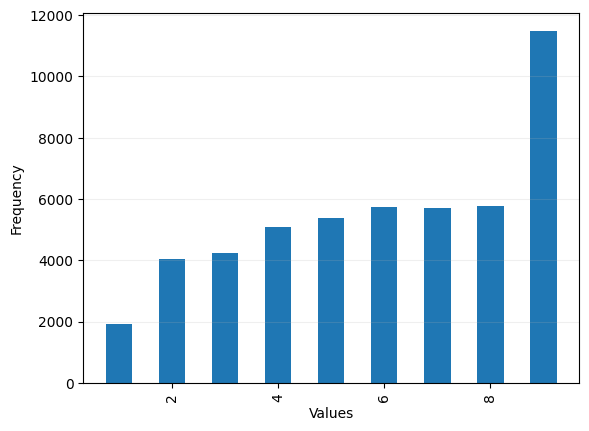

In [30]:
# Distribution Frequency for each column of our df
for i in l:
    print('Distribution Frequency:')
    print(df[i].value_counts())
    
    plt.hist(df[i], bins=range(1,11), align='left', rwidth=0.5)
    plt.grid(alpha=0.2, axis='y')
    plt.xlabel('Values')
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='price', ylabel='Count'>

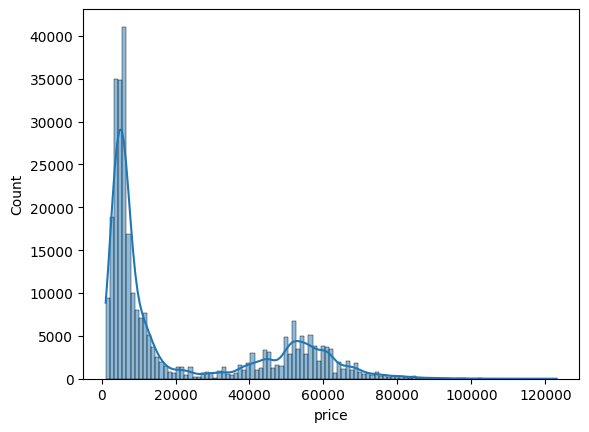

In [31]:
sns.histplot(data=df, x='price', kde=True)
# right skewed --> we will need to do some transformation 

<ipython-input-32-aab8a3e32285>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


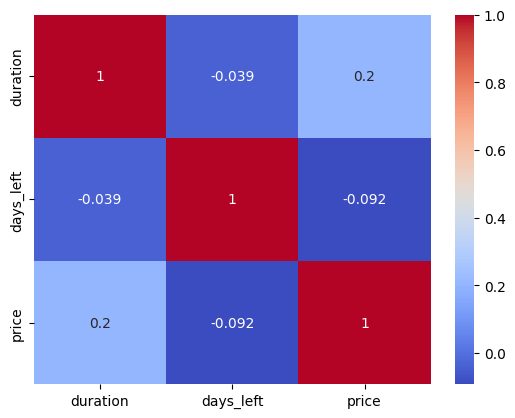

In [32]:
# correlation matrix of our numerical data (--> mezzo inutile)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

**CORRELATION OF OUR CATEGORICAL DATA:**

In order to see the correlation we want to use the Correlation Coefficiency of Spearman.

In order to compute this measure we should first transform our variables in a "category" dtypes. 

In [33]:
# check the type of our columns
for i in l:
    print(df[i].dtypes)

object
object
object
object
object
object
object
float64
int64


In [34]:
# create a new df in order to avoid to modify the official one
# because we want to transform the columns in 'category'
# Firstly we drop our numerical columns
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

df_cat = df.copy()
for i in df_cat.columns:
    if df_cat[i].dtypes == 'int64' or df_cat[i].dtypes == 'float64':       
           df_cat = df_cat.drop(i, axis=1)
df_cat.head()

        

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
Unnamed: 0,,,,,,,,
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy


In [35]:
# now we can transform our columns in 'category'
for i in df_cat.columns:
    df_cat[i] = df_cat[i].astype('category')
    print(df_cat[i].dtypes)


category
category
category
category
category
category
category
category


In [37]:
# now we can finally check the correlation 
print('Spearman correlation coefficient:')
import itertools
 
for col1, col2 in itertools.combinations(df_cat.columns, 2):
    correlation, p_value = spearmanr(df_cat[col1].cat.codes, df_cat[col2].cat.codes)
    print(col1, '-', col2, ': ', correlation)


Spearman correlation coefficient:
airline - flight :  0.7034151104009911
airline - source_city :  -0.02735238546003054
airline - departure_time :  0.05421849551088196
airline - stops :  -0.03891205058598072
airline - arrival_time :  0.0355373013881484
airline - destination_city :  -0.0298873183638078
airline - class :  -0.18756793050928966
flight - source_city :  0.026230830567236466
flight - departure_time :  0.07594613693939253
flight - stops :  -0.09626058154289178
flight - arrival_time :  0.04591479336881819
flight - destination_city :  -0.06203597994143653
flight - class :  -0.252726492158629
source_city - departure_time :  -0.009032857532994504
source_city - stops :  0.0019511299626186868
source_city - arrival_time :  0.043530711979684736
source_city - destination_city :  -0.22347900963637238
source_city - class :  -0.0003281686837138966
departure_time - stops :  -0.01372628408854511
departure_time - arrival_time :  -0.05672463417188827
departure_time - destination_city :  0.0008